<a href="https://colab.research.google.com/github/vaibhavtaware/Airbnb-bookings-Analysis/blob/main/Airbnb_Bookings_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

## <b> Explore and analyze the data to discover key understandings (not limited to these) such as : 
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it? </b>

# **Lets Try to understand the data first**
Dataset: Airbnb Bookings Analysis.

Number of observations: 48895.

Number of coulmns: 16.

Lets understand the each column in detail
1. id- This is the identity number of the property listed by a particular host.
2. name- Description of the property.
3. host_id- This is the identity number of the host who have registered on Airbnb website.
4. host_name- This is the name of the host who have registered on Airbnb website.
5. neighbourhood_group- This is the name of the neighbourhood group.
6. neighbourhood- This is the name of the neighbourhood present in the neighbourhood group.
7. latitude- This represents the coordinate of latitude of the property listed.
8. longitude- This represents the coordinate of latitude of the property listed.
9. room_type- This represents types of room listed by the host.
10. price- This is rent of listed property in USD.
11. minimum_nights- This is the minimum number nights to be spend by the guest in that property to rent a property.
12. number_of_reviews- This represents the number of reviews the particular property received.
13. last_review- The date at which property was last reviewed.
14. reviews_per_month-  Reviews per month property received.
15. calculated_host_listings_count- Number of listing done by a particular host on Airbnb.
16. availability_365- This represents the number of days property available in 365 days.


In [144]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from datetime import datetime
import math
import warnings
warnings.filterwarnings('ignore')

In [145]:
# Mount drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [146]:
# Loading the csv file 
df=pd.read_csv("/content/drive/MyDrive/Capstone Projects/AirBnB Bookings Analysis - Vaibhav Satish Taware/Airbnb NYC 2019.csv")

In [147]:
# Data Shape
print(f"The data has {df.shape[0]} number of rows and {df.shape[1]} coloumns")

The data has 48895 number of rows and 16 coloumns


In [148]:
# First 3 rows of the data
df.head(3)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365


In [149]:
# The last 3 rows of the data
df.tail(3)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2
48894,36487245,Trendy duplex in the very heart of Hell's Kitchen,68119814,Christophe,Manhattan,Hell's Kitchen,40.76404,-73.98933,Private room,90,7,0,NaN,NaN,1,23


In [150]:
# columns names 
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [151]:
# Summary of the data
df[['price','minimum_nights','number_of_reviews','reviews_per_month','calculated_host_listings_count','availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In price column minimum is 0 which can not be
 possible so we replace it with null values and then later replace it with the mean of the price.

In [152]:
# Replacing 0 with NaN  in price column
df["price"].replace(0,np.nan,inplace=True)


### **Handling missing values**

In [153]:
# To see how many missing values are pesent in each coulmn
df.isna().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                11
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

The columns which contains missing values are name,host_name,price,
last_review and reviews_per_month. Here we can not replace the missing values for name and host_name column so we remove the rows from dataframe which has missing value in name and host_name columns.


In [154]:
# Removing the missing rows in name and host_name columns
df=df[df["name"].notna()]
df=df[df["host_name"].notna()] 
df=df.reset_index()
df.drop("index",axis=1,inplace=True)
df.shape

(48858, 16)

After removing the missing value rows which has missing value in name and host_name columns and then the number of rows in a dataframe reduced to 48858,still we have missing values in price, last_review and reviews_per_month columns we replace it below.

**How the price distributed across different room types ?**

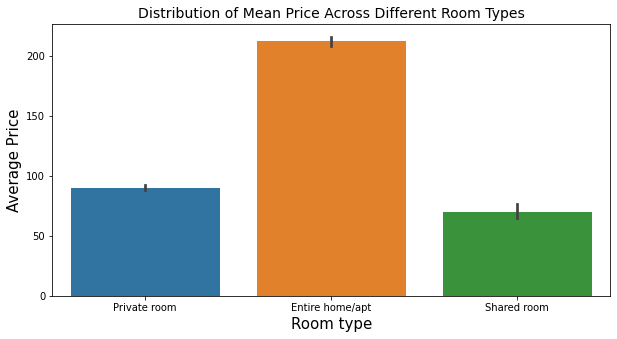

In [155]:
# Plotting barplot of price across different room types
plt.figure(figsize=(10,5));
sns.barplot(data=df,x='room_type',y='price');
plt.xlabel("Room type",fontsize=15);
plt.ylabel("Average Price",fontsize=15);
plt.title("Distribution of Mean Price Across Different Room Types",fontsize=14);

So from barplot we can see that  price is depend upon room type so we replace missing values for price column category wise i.e using room type.

In [156]:
# Replacing the missing of price column using room type 
for i in range(0,len(df.index)):
  if  df["price"].isna()[i]==True:
      type_of_room=df['room_type'][i]
      if math.isnan(df.loc[df.room_type==type_of_room,'price'].mean()):
        df["price"][i]=df["price"].mean()
      else:
        df["price"][i]=df.groupby("room_type")["price"].mean()[type_of_room]

Here we replaced the missing values of price categorywise. 





In [157]:
# Replaced missing values of column reviews_per_month by mean of the reviews_per_month column.
df.reviews_per_month.fillna(df.reviews_per_month.mean(),inplace=True)
df.isna().sum()

id                                    0
name                                  0
host_id                               0
host_name                             0
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10037
reviews_per_month                     0
calculated_host_listings_count        0
availability_365                      0
dtype: int64

Now we could see that except last_review column any other column does not have missing values. The last_review column is a date column so we cannot  replace missing values in it with computation and dropping missing value rows would lead to loss of so much information so it would be better to keep this column  as it is. 

---



**Lets see the correlation table**

In [158]:
# computing the correlation matrix using selected columns/Variables
df[["price","minimum_nights","number_of_reviews","reviews_per_month","calculated_host_listings_count","availability_365"]].corr()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,0.042800,-0.047938,-0.022372,0.057451,0.081810
minimum_nights,0.042800,1.000000,-0.081610,-0.094235,0.131313,0.145953
number_of_reviews,-0.047938,-0.081610,1.000000,0.529951,-0.072408,0.171855
reviews_per_month,-0.022372,-0.094235,0.529951,1.000000,-0.006715,0.163084
calculated_host_listings_count,0.057451,0.131313,-0.072408,-0.006715,1.000000,0.225784
availability_365,0.081810,0.145953,0.171855,0.163084,0.225784,1.000000


From above correlation table we can see that number_of_reviews and reviews_per_month are highly positively correlated with coefficient of correlation **0.529951**.

**Lest find  out which place is good to go in terms of price and availability ?**

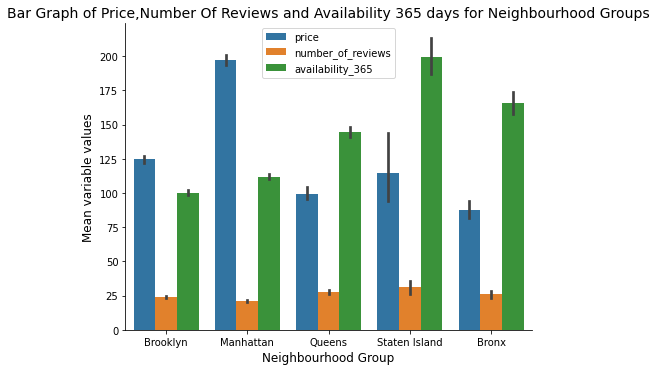

In [159]:
# Plotting the barplot 
dfs1=pd.melt(df.loc[:,["price","number_of_reviews","neighbourhood_group","availability_365"]],id_vars="neighbourhood_group");
sns.factorplot(x="neighbourhood_group",y="value",hue="variable",data=dfs1,kind="bar",size=5, aspect=1.3,legend=False);
plt.xlabel("Neighbourhood Group",fontsize=12);
plt.ylabel("Mean variable values",fontsize=12);
plt.title("Bar Graph of Price,Number Of Reviews and Availability 365 days for Neighbourhood Groups",fontsize=14);
plt.legend(loc='upper right');
plt.legend(fontsize=10);

From above bar graph we can say that mean number of reviews given by the customers are same across all the neighbourhood groups while  mean price is maximum in Manhatten  and mean availability is high in Staten Island throughout the year and Bronx is good neighbourhood group to go since this neighbourhood has minimum mean price and second highest availability 365 day's
                                              
Lets narrow it down further to get clear picture

In [160]:
#Finding the mean price using group by on neighbourhood
df.groupby(["neighbourhood_group","neighbourhood"])["price"].mean().sort_values()[0:5].reset_index().rename(columns={"neighbourhood_group":"Neighbourhood Group","neighbourhood":"Neighbourhood","price":"Mean Price"})

,Neighbourhood Group,Neighbourhood,Mean Price
0,Staten Island,Bull's Head,47.333333
1,Bronx,Hunts Point,50.500000
2,Bronx,Tremont,51.545455
3,Bronx,Soundview,53.466667
4,Staten Island,New Dorp,57.000000


This is the list of top 5 neighbourhood and their neighbourhood group which  has minimum  mean price among all the neighbourhood,from above bar graph we have seen that Bronx neighbourhood group is most affordable but we narrow it down to neighbourhood **Bull's Head** is most affordable to go which belongs to **Staten Island** followed by Hunts Point neighbourhood which belongs to Bronx neighbourhood group and so on.

So we conclude that if we want get the property on a rent in any **neighbourhood group** we should go for **Bronx** neighbourhood group and in any **neighbourhood** we should go for **Bull's Head** neighbourhood which belogs to Staten Island (neighbourhood group).

**Which room type is preferred by the host?**

In [161]:
# Groupby on room type and counting the percentage of each room type
room_type_pre=df.groupby("room_type")["host_name"].count().reset_index()
room_type_pre["Percentage of a Rooms"]=room_type_pre["host_name"]/room_type_pre["host_name"].sum()*100
room_type_pre.rename(columns={"room_type":"Room Type","host_name":"Count of Rooms"},inplace=True)
room_type_pre

,Room Type,Count of Rooms,Percentage of a Rooms
0,Entire home/apt,25393,51.973065
1,Private room,22306,45.654755
2,Shared room,1159,2.372181


Most of the hosts prefer to rent the Entire home/apt then followed by Private room and then Shared room. The percentage of shared room type is significantly low as compared to other room types. The reason behind it is the mean price for Entire home/apt is highest among all room types then followed by Private room and then shared room at the last.

**Relationship between number of reviews and minimum nights with different room types.**

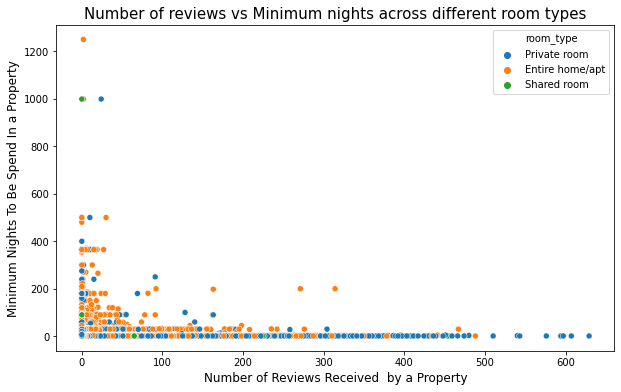

In [162]:
# Scatter plot number of reviews and minimum nights with different room types
plt.figure(figsize=(10,6))
sns.scatterplot(data=df,x="number_of_reviews",y="minimum_nights",hue='room_type');
plt.xlabel("Number of Reviews Received  by a Property",fontsize=12);
plt.ylabel("Minimum Nights To Be Spend In a Property",fontsize=12);
plt.title("Number of reviews vs Minimum nights across different room types",fontsize=15);

The reviews given by people are higher for a Private room type because people usually  prefers either Private room or Entire home/apt but at the same time minimum nights to be spend in private room is lower  than any other room type. So we can say that people tend to review the property more likely if minimum nights to be spend in that property is smaller.

**Lets see which month has received highest  last reviews.**

In [163]:
# Changing the data type of last review to datetime and extracting month and year sepharately 
df["last_review"]=pd.to_datetime(df.last_review)
df["last_review_month"]=df['last_review'].dt.month
df["last_review_year"]=df['last_review'].dt.year

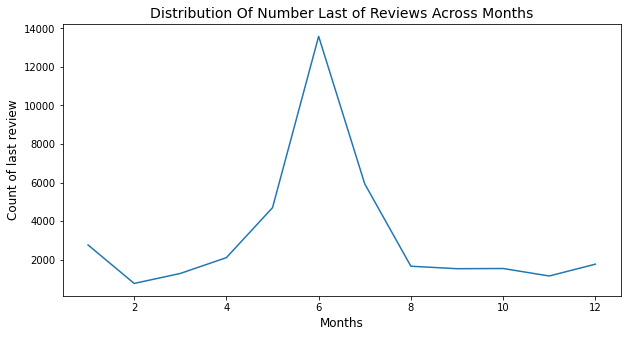

In [164]:
# plotting the line plot count of last revview vs month 
plt.figure(figsize=(10,5))
sns.lineplot(df.groupby("last_review_month")["last_review_month"].count().index,df.groupby("last_review_month")["last_review_month"].count());
plt.xlabel("Months",fontsize=12);
plt.ylabel("Count of last review",fontsize=12);
plt.title("Distribution Of Number Last of Reviews Across Months",fontsize=14);

The last review is mostly given by the customers in the month of **June** (6).

So lets dig it down in month of June for all years by considering June month data of last review

In [165]:
# Considering the only june month data for all years and then count of last review in June month for all years 
df_June_month=df[df["last_review_month"]==6]
last_6=df_June_month.groupby(["last_review_year"])["id"].count().sort_values(ascending=False).reset_index()
last_6["Percentage of count of last  review in June"]=last_6["id"]/last_6["id"].sum()*100
last_6.rename(columns={"last_review_year":"Last Review  Year","id":"Count of Last Review in June"},inplace=True)
last_6

,Last Review Year,Count of Last Review in June,Percentage of count of last review in June
0,2019.0,12599,92.735169
1,2018.0,382,2.811718
2,2016.0,247,1.818048
3,2017.0,247,1.818048
4,2015.0,89,0.655086
5,2014.0,16,0.117768
6,2013.0,4,0.029442
7,2012.0,2,0.014721


The last review was given mostly in the month of June and by seeing above table we can see that the year **2019** has the highest percentage of last review in the month June.


**What can we learn about different hosts and areas?**

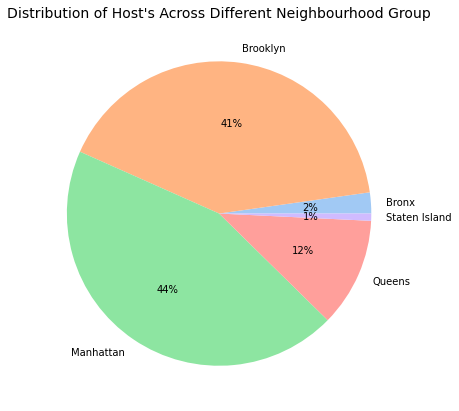

In [166]:
# plotting the pie chart across neighbourhood_group using count 
fig = plt.gcf()
fig.set_size_inches(7,7)
colors = sns.color_palette('pastel')
plt.pie(df.groupby("neighbourhood_group")["host_name"].count(), labels = df.groupby("neighbourhood_group")["host_name"].count().index, colors = colors, autopct='%.0f%%');
plt.title("Distribution of Host's Across Different Neighbourhood Group",fontsize=14);

From above piechart we can see that **Manhatten** neighbourhood group has high percentage of hosts followed by Brooklyn and so on.

In [167]:
# Count of host across different neighbourhood using count and groupby 
df.groupby(["neighbourhood_group","neighbourhood"])["host_id"].count().sort_values(ascending=False).reset_index().rename(columns={"neighbourhood_group":"Neighbourhood group","neighbourhood":"Neighbourhood"	,"host_id":"Count of host Id"})[0:5]

,Neighbourhood group,Neighbourhood,Count of host Id
0,Brooklyn,Williamsburg,3917
1,Brooklyn,Bedford-Stuyvesant,3713
2,Manhattan,Harlem,2655
3,Brooklyn,Bushwick,2462
4,Manhattan,Upper West Side,1969


These are the top 5 neighbourhood who has high count of hosts.

**What can we learn from predictions? (ex: locations, prices, reviews, etc)**

Lets see which neighbourhood has least price with their room type either as Private room or Entire room/apt .

In [168]:
# By filtering the shared room type then group by neighbourhood_group,neighbourhood and room_type and finding the mean price 
df[df["room_type"]!="Shared room"].groupby(["neighbourhood_group","neighbourhood","room_type"])["price"].mean().sort_values(ascending=True).reset_index().rename(columns={"neighbourhood_group":"Neighbourhood group","neighbourhood":"Neighbourhood","price":"Mean Price","room_type":"Room Type"})[0:5]

,Neighbourhood group,Neighbourhood,Room Type,Mean Price
0,Staten Island,Graniteville,Private room,20.000000
1,Staten Island,Grant City,Private room,29.500000
2,Bronx,Van Nest,Private room,36.666667
3,Bronx,Castle Hill,Private room,38.600000
4,Staten Island,New Dorp Beach,Private room,38.666667


People usually go for Entire home/apt or  Private room so after removing the shared room type we obtain the above table which shows that the **Graniteville** neighbourhood has the mean minimum price among all neighbourhood's.

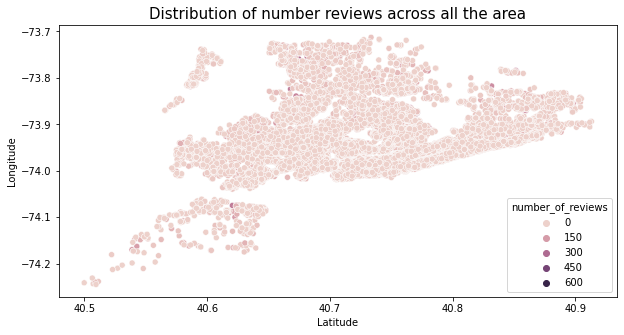

In [169]:
# To see how number of reviews across all location using scatter plot.
plt.figure(figsize=(10,5));
sns.scatterplot(data=df,x="latitude",y="longitude",hue="number_of_reviews");plt.xlabel("Latitude",fontsize=10);
plt.title("Distribution of number reviews across all the area",fontsize=15);plt.ylabel("Longitude",fontsize=10);

From above scatter plot we could see that the number of reviews across all the locations are mostly lies between 0 to 150.

Lets see the outliers in the number of reviews

In [170]:
# Computing the quartiles of number of reviews and iqr and upper bound
q1=np.quantile(df["number_of_reviews"],.25)
q3=np.quantile(df["number_of_reviews"],.75)
iqr=q3-q1
upper_bound_= q3+(1.5*iqr)
print(f"This {upper_bound_} is the upper bound for outlier of number of reviews.")

This 58.5 is the upper bound for outlier of number of reviews.


Lets a consider outlier data in terms of number of reviews to see in which area those outliers belong to ?

In [171]:
# Filetring the data using upper bound and to see which area these outlier lies in 
df_with_outlier_review=df[df["number_of_reviews"]>upper_bound_]
df_with_outlier_review.groupby("neighbourhood_group")["price"].count().sort_values(ascending=False).reset_index().rename(columns={"neighbourhood_group":"Neighbourhood Group/Area","price":"Count of outlier reviews"})

,Neighbourhood Group/Area,Count of outlier reviews
0,Brooklyn,2611
1,Manhattan,2347
2,Queens,832
3,Bronx,157
4,Staten Island,68


**Brooklyn** has the highest number of outlier reviews.

**Which hosts are the busiest and why?**

To see the busiest host's we consider data with 0 availability 365 day's

In [172]:
# Filtering the data when availability_365 is 0 and using filtered data and created dataframe seeing top 10 busiest data using groupby
df_with_0_availability_365=df[df["availability_365"]==0]
Most_busiest_hosts=df_with_0_availability_365.groupby(["host_id","host_name"])["availability_365"].count().sort_values(ascending=False).reset_index().rename(columns={"host_id":"Host ID","host_name":"Host Name","availability_365":"Count of 0 availability 365 days"})
print(f"There are {Most_busiest_hosts.shape[0]} most busiest hosts who has 0 availability 365 days")
Most_busiest_hosts[0:10]


There are 16410 most busiest hosts who has 0 availability 365 days


,Host ID,Host Name,Count of 0 availability 365 days
0,19303369,Hiroki,16
1,100238132,Michael,12
2,51596474,Antony,12
3,137358866,Kazuya,11
4,204852306,Dee,11
5,193502084,Linda,8
6,24831061,Hosteeva,8
7,51913826,The Bowery House,8
8,732460,Nôm,6
9,187487947,Diego,6


These are the top 10 hosts those are most busiest among all 16410 hosts who have 0 availability 365 days and here Count of 0 availability 365 days  column shows that number of time that host has 0 availability.

Lets see percentage of room types with 0 availability 365 days

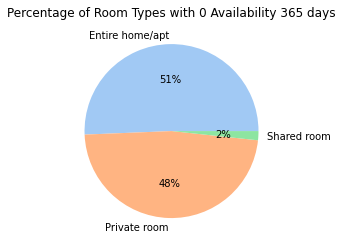

In [173]:
# plotting the piechart for all hosts who have 0 availability 365 days using room type
top_10_busiest_host_id=list(Most_busiest_hosts["Host ID"][0:10])
df_with_0_availability_365.set_index("host_id",inplace=True)
df_of_top_busiest_host=df_with_0_availability_365.loc[top_10_busiest_host_id]
plt.pie(df_with_0_availability_365.groupby("room_type")["room_type"].count(),labels=df_with_0_availability_365.groupby("room_type")["room_type"].count().index,colors = colors, autopct='%.0f%%');
plt.title("Percentage of Room Types with 0 Availability 365 days",fontsize=12);

:From above pie chart we can see that shared rooms have only 2% 0 availability 365 days it means shared rooms does have not have a high traffic whereas Entire home/apt and Private rooms are high in  demand.

Lets see percentage of room types offered by top 10 busiest host's

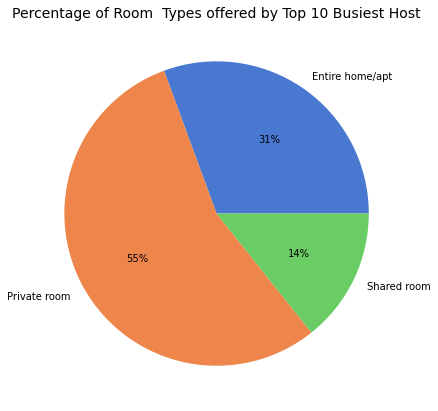

In [174]:
# plotting the piechart for top 10 hosts using room type in which room type they have invested in 
fig = plt.gcf()
fig.set_size_inches(7,7)
colors = sns.color_palette('muted')
plt.pie(df_of_top_busiest_host.groupby("room_type")["room_type"].count(), labels = df_of_top_busiest_host.groupby("room_type")["room_type"].count().index, colors = colors, autopct='%.0f%%');
plt.title("Percentage of Room  Types offered by Top 10 Busiest Host",fontsize=14);

In pie chart with title Percentage of Room Types with 0 Availability 365 days  we can see that Entire home/apt and Private room percnatge of 0 availability 365 days is very high and in above pie chart we can see that mostly most busiest top 10 host's offers Entire home/apt and Private room in higher percentage so this could be the one reason of being most busiest hosts.

**Is there any noticeable difference of traffic among different areas and what could be the reason for it?**

In [175]:
# counting total number of reviews across all neighbourhood_group using groupby 
df.groupby("neighbourhood_group")["number_of_reviews"].sum().sort_values(ascending=False).reset_index().rename(columns={"neighbourhood_group":"Neighbourhood Group/Area","number_of_reviews":"Total Number of reviews"})[0:3]

,Neighbourhood Group/Area,Total Number of reviews
0,Brooklyn,486174
1,Manhattan,454126
2,Queens,156902


The higher is the total number of reviews this implies more is the number of the customers have visited to that area and higher is traffic in that area. Above table shows the top 3 high traffic areas.

**Lets see the reason of being in a top 3**

---



In [176]:
# comuting the mean for minimum nights to spend in a porperty across all neighbourhood_group using groupby
df.groupby("neighbourhood_group")["minimum_nights"].mean().sort_values(ascending=False).reset_index().rename(columns={"neighbourhood_group":"Neighbourhood Group/Area","minimum_nights":"Mean Minimum Nights"})

,Neighbourhood Group/Area,Mean Minimum Nights
0,Manhattan,8.538188
1,Brooklyn,6.057693
2,Queens,5.182910
3,Staten Island,4.831099
4,Bronx,4.564738


The mean minimum nights to be spend in top 3 high traffic area's is also high this means that customer has to spend more nights in these area's  than any other area's so this could be the one reason of high traffic. 

Lets see percentage share of a room types across different area's

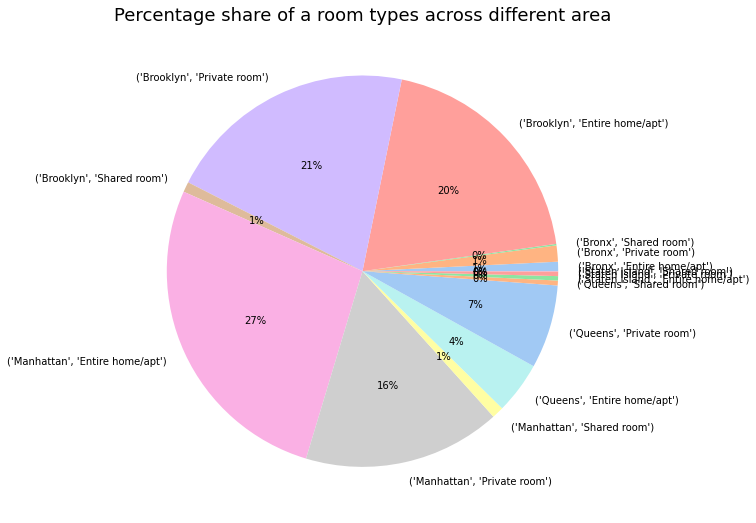

In [177]:
# plotting the pei chart using group by on neighbourhood_group and room_type
fig = plt.gcf()
fig.set_size_inches(9,9)
colors = sns.color_palette('pastel')
plt.pie(df.groupby(["neighbourhood_group","room_type"])["room_type"].count(),labels=df.groupby(["neighbourhood_group","room_type"])["room_type"].count().index,colors = colors, autopct='%.0f%%');
plt.title("Percentage share of a room types across different area",fontsize=18);

When customer look for a room either they go for a Entire home/apt or Private room mostely, from above pie chart we can see that the high traffic area's such as Manhattan,Brooklyn and Queens have higher percentage of both Entire home/apt or Private room types so this could be the second reason for high traffic in these areas.

**Which area is most expensive ? and Why ?**

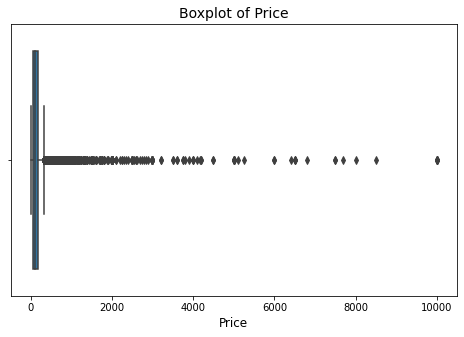

In [178]:
# Boxplot for price column
plt.figure(figsize=(8,5));
sns.boxplot(df["price"]);
plt.title("Boxplot of Price",fontsize=14);
plt.xlabel("Price",fontsize=12);

After seeing the above boxplot we can see that there are so many outliers present above the upper whisker so lets calculate the upper bound for outliers in price column.

In [179]:
# Computing the quartiles,iqr and upper bound to get the outliers 
q1=np.quantile(df["price"],.25)
q3=np.quantile(df["price"],.75)
iqr=q3-q1
upper_bound = q3+(1.5*iqr)
print(f"This {upper_bound} is the upper bound for outlier of price.")

This 334.0 is the upper bound for outlier of price.


 **334.0** is the upper bound for price anything above 334.0 in price column would be considered as a outlier.

Below we consider outlier price data i.e data with price more than 334.0 in price column and try to see in which area's those outliers lies in and thier room types. The reason to see  the different room types is because the price is dependent on room types.


In [180]:
# filtering out the price data using above upper bound and calculating the count percent of room type and creating the seprate dataframe for it 
df_outlier_price=df[df["price"]>upper_bound]
d=df_outlier_price.groupby(["neighbourhood_group","room_type"])["id"].count().reset_index().sort_values(by="id",ascending=False)
d["Count of Room types in Percent"]=(d["id"]/d["id"].sum())*100
d.drop("id",axis=1,inplace=True) 
d.rename(columns={"neighbourhood_group":"Neighbourhood Group","room_type":"Room Type"},inplace=True)
d

,Neighbourhood Group,Room Type,Count of Room types in Percent
6,Manhattan,Entire home/apt,64.086166
3,Brooklyn,Entire home/apt,20.767418
7,Manhattan,Private room,7.909795
9,Queens,Entire home/apt,2.490744
4,Brooklyn,Private room,2.356109
10,Queens,Private room,0.706833
0,Bronx,Entire home/apt,0.538539
8,Manhattan,Shared room,0.504881
12,Staten Island,Entire home/apt,0.269270
1,Bronx,Private room,0.134635


From above table we can see that most of outliers are from **Manhattan** area and their room type is Entire home/apt which accounts to 64.1 % of the data and then followed by Brooklyn area with same room type i.e Entire home/apt with 20.8 % and so on.


Lets  see why Manhatten area has highest outliers ?

For this first we consider room type as Entire home/apt since this room type has highest outliers and high price than any other room type that can be seen through the bar plot shown above with title "Distribution of Mean Price Across Different Room Types".

So from below pie chart we can see that Manhatten area has the highest Entire home/apt so it has higher number of outliers.

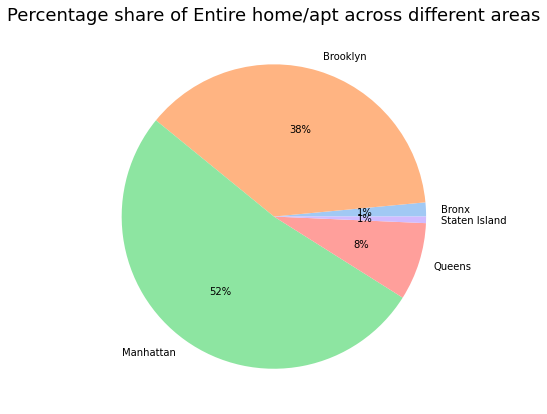

In [181]:
# Creating the datframe for for entire home/apt and then plotting pie chart across different areas
df_Entire_home_apt=df[df["room_type"]=="Entire home/apt"]
fig = plt.gcf()
fig.set_size_inches(7,7)
colors = sns.color_palette('pastel')
plt.pie(df_Entire_home_apt.groupby("neighbourhood_group")["id"].count(),labels=df_Entire_home_apt.groupby("neighbourhood_group")["id"].count().index,colors = colors, autopct='%.0f%%');
plt.title("Percentage share of Entire home/apt across different areas",fontsize=18);

**Who are the top 10 host's who have listed their property maximum number of** **times ?** 

**which room type they have invested ?** 

**and in which area their property belongs to ?**

In [182]:
# creating the dataframe of top 10 hosts who have listed their maximum number of times
top_10_listed_host=df.groupby("host_id")["id"].count().sort_values(ascending=False).reset_index().rename(columns={"host_id":"Host ID","id":"Listing Count of host id"})[0:10]
top_10_listed_host

,Host ID,Listing Count of host id
0,219517861,327
1,107434423,232
2,30283594,121
3,137358866,103
4,12243051,96
5,16098958,96
6,61391963,91
7,22541573,87
8,200380610,65
9,1475015,52


These are the top 10 host's with highest number of property listing count.


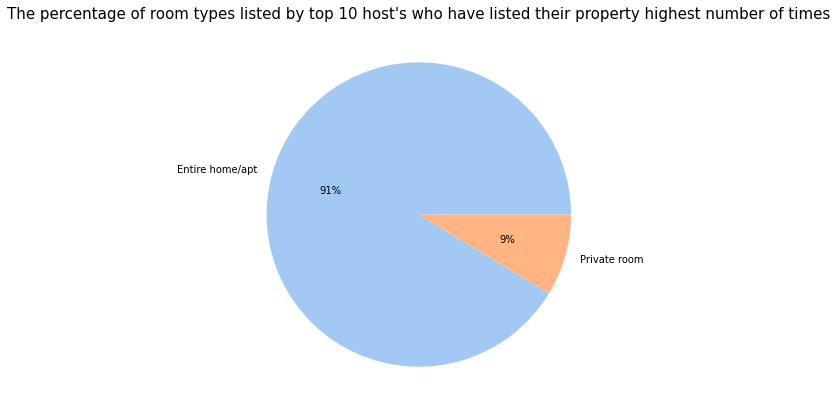

In [183]:
# creaitng the dataframe top 10 hosts and using that dataframe creating the pie chart of room type 
top_host_id_list=list(top_10_listed_host["Host ID"])
df_host_id_index=df.set_index("host_id")
df_top10_listing_count=df_host_id_index.loc[top_host_id_list]
df_top10_listing_count.reset_index(inplace=True)
df_top10_listing_count.groupby("room_type")["id"].count()
fig = plt.gcf()
fig.set_size_inches(7,7)
colors = sns.color_palette('pastel')
plt.pie(df_top10_listing_count.groupby("room_type")["id"].count(), labels = df_top10_listing_count.groupby("room_type")["id"].count().index, colors = colors, autopct='%.0f%%');
plt.title("The percentage of room types listed by top 10 host's who have listed their property highest number of times",fontsize=15);

Top 10 hosts only prefers to rent the Entire home/apt or Private room and not the shared room the reason behind it could be the price. The price for Entire home/apt and Private room is significantly higher than shared  room.
And also we can see that percentage Entire home/apt rented by the top 10 host's is very high as compared to Private room percentage.

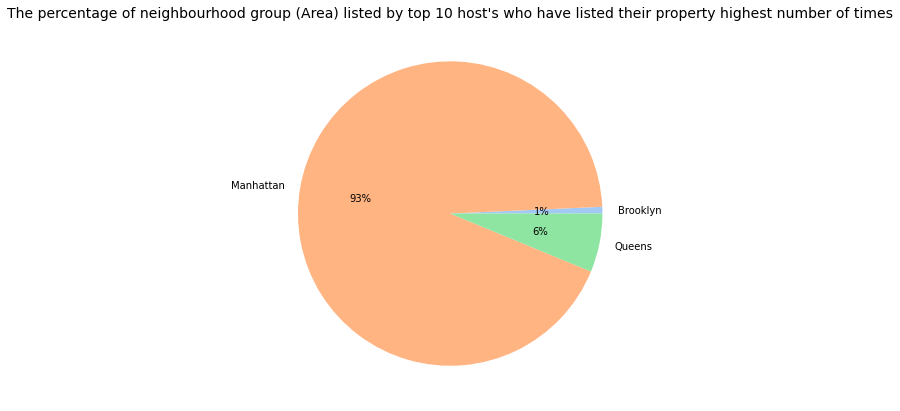

In [184]:
# pie chart of the neighbourhood_group using for top 10 hosts who have listed their maximum times 
df_top10_listing_count.groupby("neighbourhood_group")["id"].count()
fig = plt.gcf()
fig.set_size_inches(7,7)
colors = sns.color_palette('pastel')
plt.pie(df_top10_listing_count.groupby("neighbourhood_group")["id"].count(), labels = df_top10_listing_count.groupby("neighbourhood_group")["id"].count().index, colors = colors, autopct='%.0f%%');
plt.title("The percentage of neighbourhood group (Area) listed by top 10 host's who have listed their property highest number of times",fontsize=14);

Top 10 host's only prefers to rent property in  Manhattan,Queens and Brooklyn area and not in  Staten Island and Bronx  area. The reason for it could be the minimum nights to be spent in these area's is higher than other two area's which is shown in below table.
And also we can see that percentage property rented in Manhattan by the top 10 host's is very high as comapred to Brooklyn and Queens,s percentage.




In [185]:
# finding out the mean of minimum nights using group by on neighbourhood_group
df.groupby("neighbourhood_group")["minimum_nights"].mean().sort_values(ascending=False).reset_index().rename(columns={"neighbourhood_group":"Neighbourhood Group (Area)","minimum_nights":"Mean Minimum Nights"})

,Neighbourhood Group (Area),Mean Minimum Nights
0,Manhattan,8.538188
1,Brooklyn,6.057693
2,Queens,5.182910
3,Staten Island,4.831099
4,Bronx,4.564738


Conclusions:

Bull's Head is most affordable and good availability place to go which belongs to Staten Island.

Most of the hosts prefer to rent the Entire home/apt then followed by Private room and then Shared room.

The year 2019 has the highest percentage of last review in the month June.

Manhattan neighbourhood group has high percentage of hosts.

People usually go for Entire home/apt or Private room and Graniteville neighbourhood has the mean minimum price among all neighbourhood's.

Shared rooms does have not have a high traffic whereas Entire home/apt and Private rooms are high in demand. Most busiest top 10 host's offers Entire home/apt and Private room in higher percentage so this could be the one reason of being most busiest hosts.

Brooklyn has high traffic among all neighbourhood group.
Manhattan  area is most expensive.
